In [2]:
%pylab inline

matplotlib.rcParams['figure.figsize'] = (12, 7)
matplotlib.rcParams.update({'figure.autolayout': True})
font = {'size': 12}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import csv
import pandas as pd

In [4]:
def same_result(row):
    res = False
    if row['norm_score'] < 0 and row['norm_liwc'] < 0:
        res = True
    if row['norm_score'] > 0 and row['norm_liwc'] > 0:
        res = True
    if row['norm_score'] == 0 and row['norm_liwc'] == 0:
        res = True
    return res

###a) 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a392a6a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0a38fd7a10>]], dtype=object)

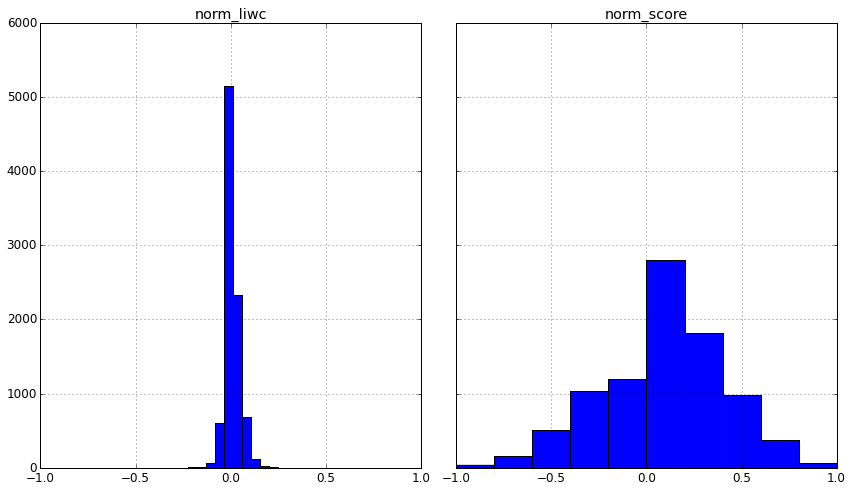

In [11]:
df = pd.read_csv('results_subtraction_100.csv')
df[['norm_score', 'norm_liwc']].hist(sharey=True, sharex=True)

AttributeError: Unknown property share_y

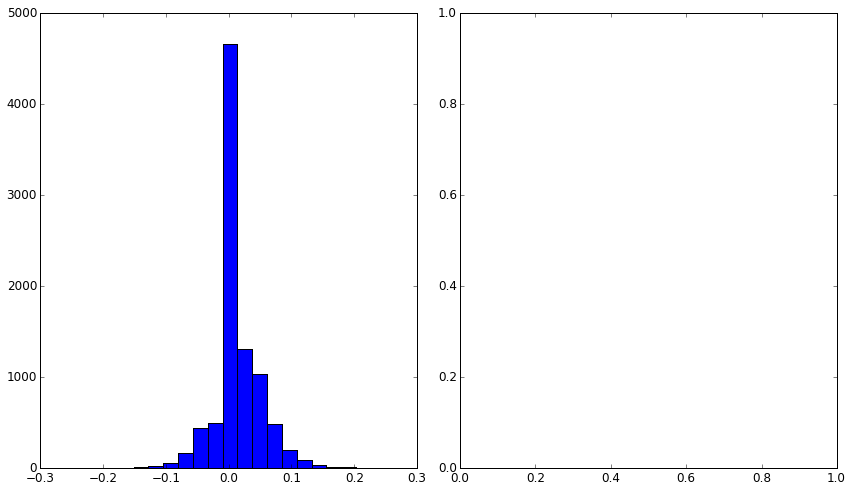

In [45]:
pd.read_csv('results_subtraction_100.csv')[['norm_score', 'norm_liwc']].hist(bins=20, share_y=True)

ImportError: No module named scipy.stats

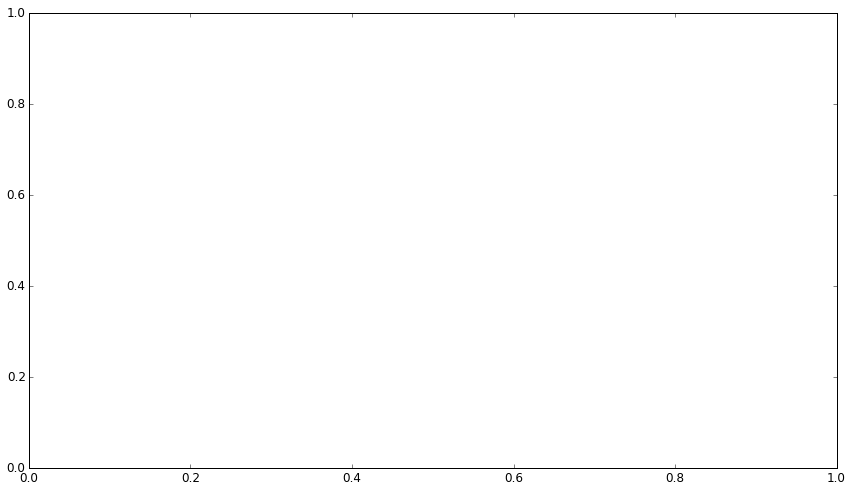

In [44]:
pd.read_csv('results_subtraction_100.csv')[['norm_score', 'norm_liwc']].plot(kind='kde')

/home/antonio/.virtualenvs/lexisnexis/local/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


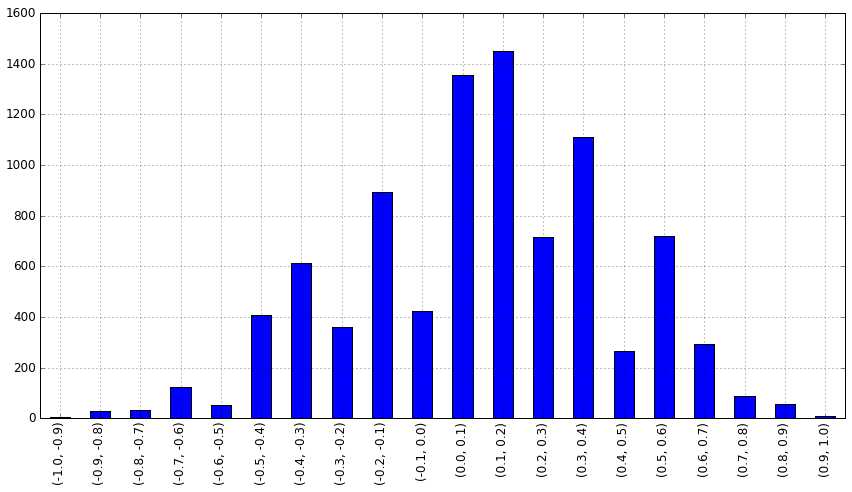

In [6]:
expe_sr = pd.Series(d_expe)
expe_sr.plot(kind='bar')

In [37]:
expe_sr.head()

-1.0  -0.9      6
-0.9  -0.8     27
-0.8  -0.7     32
-0.7  -0.6    125
-0.6  -0.5     53
dtype: int64

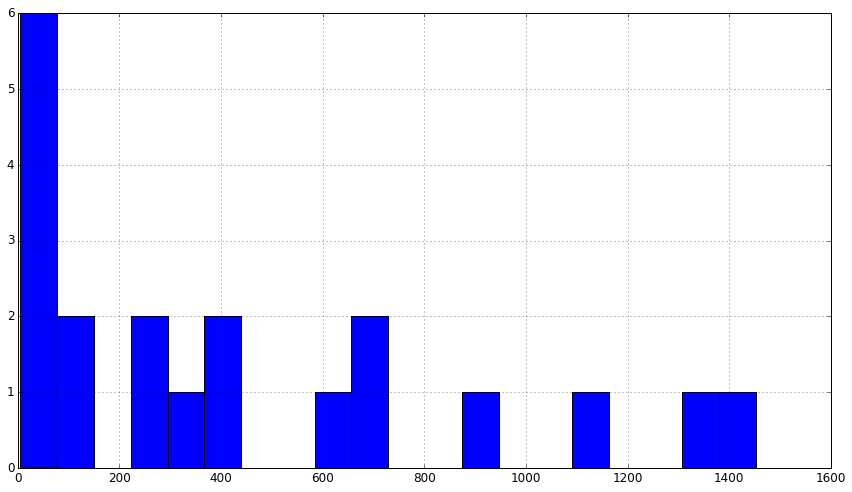

In [27]:
expe_sr.hist(bins=20)

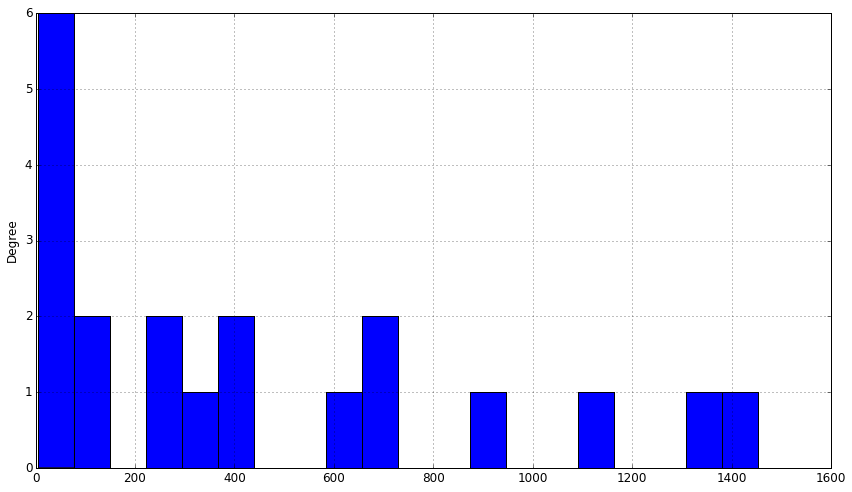

In [29]:
expe_sr.plot(kind='hist', bins=20)

In [8]:
liwc_sr = pd.Series(d_liwc)

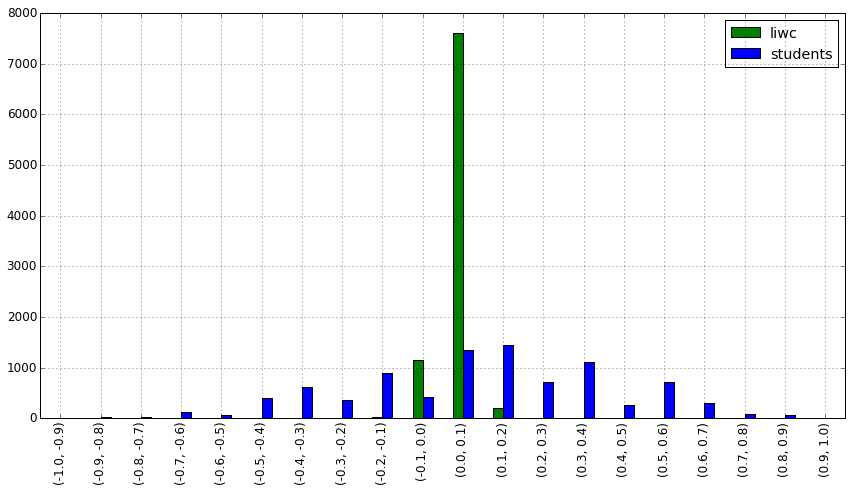

In [9]:
both_df = pd.DataFrame({
    'students': expe_sr,
    'liwc': liwc_sr,
})
both_df.plot(kind='bar', color=['g', 'b'])

In [10]:
df = pd.read_csv('results_subtraction_100.csv')
df['same'] = df.apply(same_result, axis=1)
total = df.same.count()
equals = df[df.same == True].count()['same']
different = df[df.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


###a) 2)

In [11]:
results = open('results_minmax_100.csv')
result_reader = csv.reader(
    results,
    delimiter=',',
    quotechar='"'
)
result_reader.next()
d_expe = {}
d_liwc = {}
for row in result_reader:
    value_expe = float(row[4])
    inter_expe = assign_interval(value_expe, intervals)
    if inter_expe in d_expe:
        d_expe[inter_expe] += 1
    else:
        d_expe[inter_expe] = 1
    value_liwc = float(row[5])
    inter_liwc = assign_interval(value_liwc, intervals)
    if inter_liwc in d_liwc:
        d_liwc[inter_liwc] += 1
    else:
        d_liwc[inter_liwc] = 1

In [12]:
expe_sr = pd.Series(d_expe)
liwc_sr = pd.Series(d_liwc)

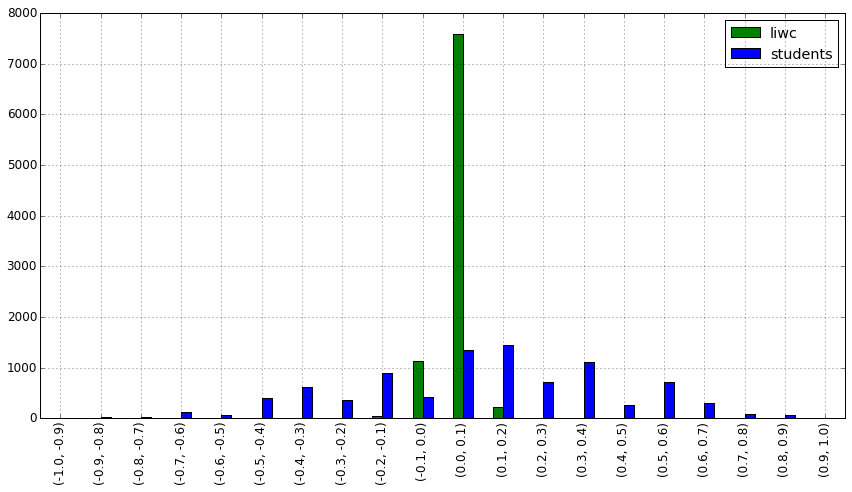

In [13]:
both_df = pd.DataFrame({
    'students': expe_sr,
    'liwc': liwc_sr,
})
both_df.plot(kind='bar', color=['g', 'b'])

In [14]:
df = pd.read_csv('results_minmax_100.csv')
df['same'] = df.apply(same_result, axis=1)
total = df.same.count()
equals = df[df.same == True].count()['same']
different = df[df.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


###b) 1)

In [15]:
results = open('results_subtraction_minmax.csv')
result_reader = csv.reader(
    results,
    delimiter=',',
    quotechar='"'
)
result_reader.next()
d_expe = {}
d_liwc = {}
for row in result_reader:
    value_expe = float(row[4])
    inter_expe = assign_interval(value_expe, intervals)
    if inter_expe in d_expe:
        d_expe[inter_expe] += 1
    else:
        d_expe[inter_expe] = 1
    value_liwc = float(row[5])
    inter_liwc = assign_interval(value_liwc, intervals)
    if inter_liwc in d_liwc:
        d_liwc[inter_liwc] += 1
    else:
        d_liwc[inter_liwc] = 1

In [16]:
expe_sr = pd.Series(d_expe)
liwc_sr = pd.Series(d_liwc)

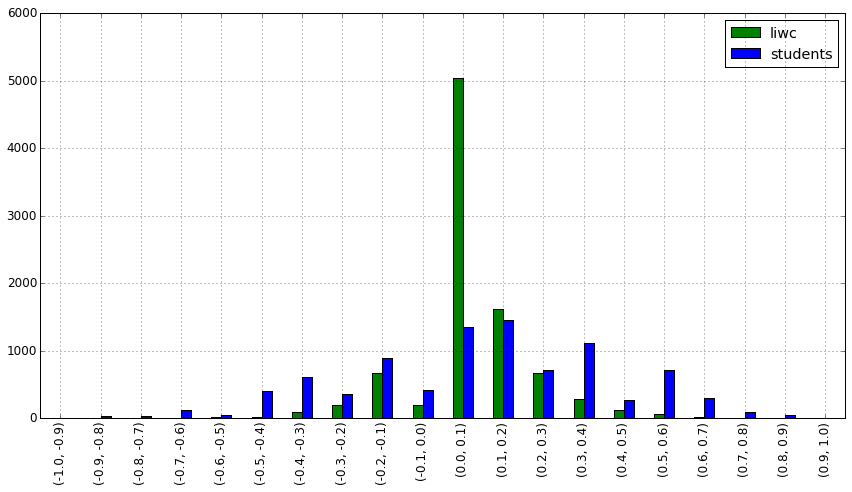

In [17]:
both_df = pd.DataFrame({
    'students': expe_sr,
    'liwc': liwc_sr,
})
both_df.plot(kind='bar', color=['g', 'b'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f085521e950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f08551800d0>]], dtype=object)

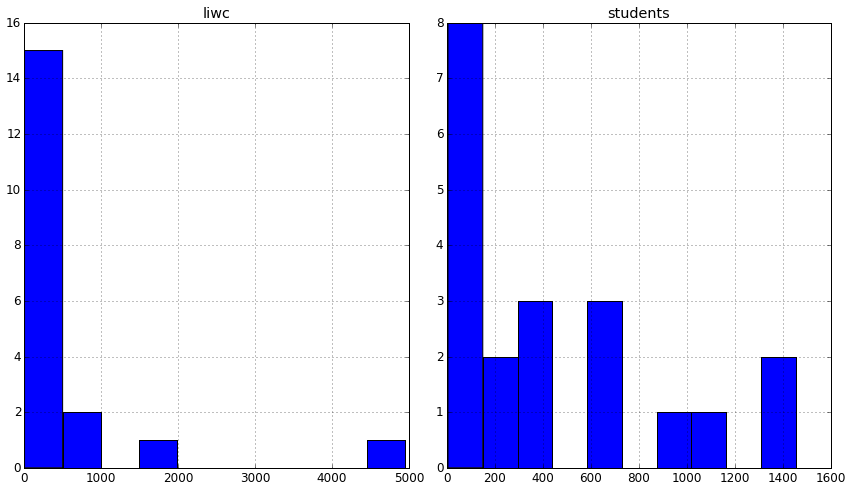

In [32]:
both_df.hist()

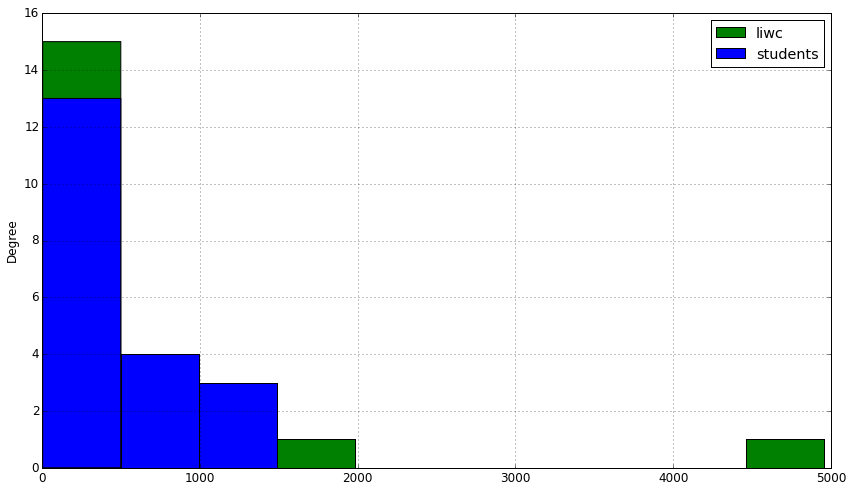

In [36]:
both_df.plot(kind='hist', color=['g', 'b'], bins=10)

In [18]:
df = pd.read_csv('results_subtraction_minmax.csv')
df['same'] = df.apply(same_result, axis=1)
total = df.same.count()
equals = df[df.same == True].count()['same']
different = df[df.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


###b) 2)

In [19]:
results = open('results_minmax_minmax.csv')
result_reader = csv.reader(
    results,
    delimiter=',',
    quotechar='"'
)
result_reader.next()
d_expe = {}
d_liwc = {}
for row in result_reader:
    value_expe = float(row[4])
    inter_expe = assign_interval(value_expe, intervals)
    if inter_expe in d_expe:
        d_expe[inter_expe] += 1
    else:
        d_expe[inter_expe] = 1
    value_liwc = float(row[5])
    inter_liwc = assign_interval(value_liwc, intervals)
    if inter_liwc in d_liwc:
        d_liwc[inter_liwc] += 1
    else:
        d_liwc[inter_liwc] = 1

In [20]:
expe_sr = pd.Series(d_expe)
liwc_sr = pd.Series(d_liwc)

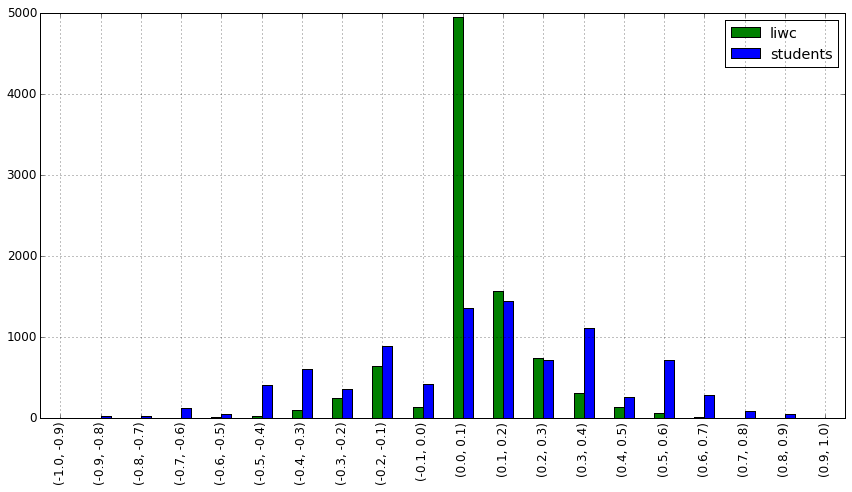

In [21]:
both_df = pd.DataFrame({
    'students': expe_sr,
    'liwc': liwc_sr,
})
both_df.plot(kind='bar', color=['g', 'b'])

In [22]:
df = pd.read_csv('results_minmax_minmax.csv')
df['same'] = df.apply(same_result, axis=1)
total = df.same.count()
equals = df[df.same == True].count()['same']
different = df[df.same == False].count()['same']
print 'Total:', total
print 'Equals:', equals
print 'Different:', different
print 'Accuracy:', float(equals) * 100 / total

Total: 8996
Equals: 3202
Different: 5794
Accuracy: 35.5935971543


In [23]:
import xlrd

In [24]:
pd.read_excel('demographics.xlsx')

,StartDate,EndDate,ID_code,Age,Gender,Country_Birth,Postal_Code,Primary_Language,Faculty
0,2015-01-19 09:21:14,2015-01-19 10:04:38,4477,18,1,canada,K7P,English,9
1,2015-01-19 09:21:36,2015-01-19 10:04:35,4708,18,1,canada,n0n,english,6
2,2015-01-19 09:22:29,2015-01-19 10:03:53,5245,19,1,Canada,N6A,English,10
3,2015-01-19 09:22:39,2015-01-19 10:04:03,5605,18,1,United Arab Emirates,L3S,Tamil,10
4,2015-01-19 09:22:49,2015-01-19 10:03:33,5662,18,1,Canada,N6K,English,9
5,2015-01-19 09:23:00,2015-01-19 10:04:16,5338,18,1,Syria,N6C,Arabic,10
6,2015-01-20 09:37:09,2015-01-20 09:50:58,4960,18,2,Australia,Aus,English,10
7,2015-01-20 09:37:17,2015-01-20 09:50:36,5620,18,1,Canada,L6C,Cantonese,10
8,2015-01-20 09:37:18,2015-01-20 09:50:20,4606,18,2,Canada,N9E,English,9
9,2015-01-20 09:37:19,2015-01-20 09:50:31,2457,18,1,Canada,l6c,english,6
